# DSCI 573 - Feature and Model Selection

# Lab 4: A mini project - Putting it all together

## Table of contents
0. [Submission instructions](#si) (4%)
1. [Understanding the problem](#1) (4%)
2. [Data splitting](#2) (2%)
3. [EDA](#3) (10%)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) (10%)
6. [Baseline model](#6) (2%)
7. [Linear models](#7) (10%)
8. [Different models](#8) (16%)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10) (10%)
11. [Interpretation and feature importances](#11) (10%)
12. [Results on the test set](#12) (10%)
13. [Summary of the results](#13) (12%)
15. (Optional) [Reproducible data analysis pipeline](#14)
15. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **Which problem did you pick, classification or regression?** We picked the **classification problem** of predicting whether a credit card client will default or not.
- **Report your test score here along with the metric used:** 
- **Please add a link to your GitHub repository here: https://github.com/UBC-MDS/default_classifier_573_lab4** Team: Anupriya Srivastava, Melisa Maidana, Abhiket Gaurav and Mahmoodur Rahman.
- **You don't have to but you may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. Since I don't know your groups in advance, I am not opening this lab as a group lab. So you all will have a separate GitHub repository for your labs and you'll have to decide how you want to collaborate. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final .ipynb file with your solutions to your GitHub repository for this lab.
- Upload the .ipynb file to Gradescope.
- If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb. 
- Make sure that your plots/output are rendered properly in Gradescope.

> [Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

> As usual, do not push the data to the repository. 

## Imports

In [1]:
import os
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV,RidgeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.svm import SVC, SVR

%matplotlib inline

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

## 1. Pick your problem and explain what exactly you are trying to predict <a name="1"></a>
<hr>
rubric={reasoning:4}

In this mini project, you will pick one of the following problems: 

- A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

- A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)

<hr>

### Credit Card Default Detection

We have chosen the classification problem for this lab. Here we are building a model that would predict whether a credit card client will default or not based on their demographic factors, credit data, history of payment, and previous bill statements. This data set contains information of credit card clients in Taiwan, from April 2005 to September 2005. It has 30000 examples, 24 features and the target variable ("default.payment.next.month"). 

#### Data Description (adapted from Kaggle)

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1= 1 month payment delay, 2=2 months payment delay,..., 9=9 months payment delay and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

##### 1.1 & 1.2 Reading and Understanding the Data

In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Check features' data types
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Describe features
credit_df.describe(include = "all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##### 1.3 Pre-processing

There are no missing values. Hence, we are not performing any missing value treatment. 

In [5]:
# Check for null values
credit_df.isnull().values.any()

False

Re-naming all the columns to their corresponding months for better interpretability. 

In [6]:
# Re-naming all the columns to their corresponding months 
credit_df = credit_df.rename(columns = {'default.payment.next.month': 'default',
                                        'PAY_0': 'repay_sep',
                                        'PAY_2': 'repay_aug',
                                        'PAY_3': 'repay_jul',
                                        'PAY_4': 'repay_jun',
                                        'PAY_5': 'repay_may',
                                        'PAY_6': 'repay_apr',
                                        'BILL_AMT1': 'bill_sep',
                                        'BILL_AMT2': 'bill_aug',
                                        'BILL_AMT3': 'bill_jul',
                                        'BILL_AMT4': 'bill_jun',
                                        'BILL_AMT5': 'bill_may',
                                        'BILL_AMT6': 'bill_apr',
                                        'PAY_AMT1': 'pay_sep',
                                        'PAY_AMT2': 'pay_aug',
                                        'PAY_AMT3': 'pay_jul',
                                        'PAY_AMT4': 'pay_jun',
                                        'PAY_AMT5': 'pay_may',
                                        'PAY_AMT6': 'pay_apr'}, inplace = False)

In [7]:
credit_df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [8]:
credit_df["default"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

As we can see there is a class imbalance problem, since the positive class (default) represents only 22% of the total examples. However, this is expected, as the number of clients defaulting would always be significantly lesser than those not defaulting. 

## 2. Data splitting <a name="2"></a>
<hr>
rubric={reasoning:2}

**Your tasks:**

1. Split the data into train and test portions.

> Make decision on the `test_size` based on the capacity of your laptop. Don't forget to use a random state.  

Since we have only 30,000 observations we have decided to do a 80:20 split between the train and test dataset

In [9]:
train_df, test_df = train_test_split(credit_df, test_size=0.20, random_state=573)

X_train = train_df.drop(columns=["default"])
y_train = train_df["default"]

X_test = test_df.drop(columns=["default"])
y_test = test_df["default"]

In [10]:
X_train.shape

(24000, 24)

## 3. EDA <a name="3"></a>
<hr>
rubric={viz:4,reasoning:6}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

We have extracted the following features:
1) default_sep, default_aug, default_jul, default_jun, default_may, default_apr: categorize the payment status in 3 possible levels depending on how close to the due date the client paid the balance in that given month,
2) defaulter_3m, defaulter_6m: indicate whether the client has or not defaulted in the last 3/6 months,
3) util_sep, util_aug, util_jul, util_jun, util_may, util_apr: indicate the percentage of credit utilization in that given month (credit limit vs spent)

In [11]:
def default_category(x):
    """
    Categorize the payment status in 3 possible levels 
    depending on how close to the due date the client paid the balance in that given month

    Parameters
    ----------
    x : integer
        Repayment status for a given month 
        (-1=pay duly, 1 = 1 month of delay,..., 9=9 months of delay and above)

    Returns
    -------
    integer:    0 if the balance for that particular month was paid timely, 
                1 if it was paid within 3 months past due, 
                2 if was paid with 4 or more months of delay
    """
    if x <= 0:
        return 0
    elif x > 0 and x < 4:
        return 1
    else:
        return 2

X_train['default_apr'] = X_train.apply(lambda X_train: default_category(X_train['repay_apr']), axis=1)
X_train['default_may'] = X_train.apply(lambda X_train: default_category(X_train['repay_may']), axis=1)
X_train['default_jun'] = X_train.apply(lambda X_train: default_category(X_train['repay_jun']), axis=1)
X_train['default_jul'] = X_train.apply(lambda X_train: default_category(X_train['repay_jul']), axis=1)
X_train['default_aug'] = X_train.apply(lambda X_train: default_category(X_train['repay_aug']), axis=1)
X_train['default_sep'] = X_train.apply(lambda X_train: default_category(X_train['repay_sep']), axis=1)

In [12]:
X_train['defaulter_6m'] = X_train['default_apr'] + X_train['default_may'] + X_train['default_jun']+ X_train['default_jul'] + X_train['default_aug']+ X_train['default_sep']
X_train['defaulter_3m'] = X_train['default_jul'] + X_train['default_aug']+ X_train['default_sep']

In [13]:
X_train['defaulter_6m'] = X_train.apply(lambda X_train: 1 if X_train['defaulter_6m']>0 else 0, axis=1)
X_train['defaulter_3m'] = X_train.apply(lambda X_train: 1 if X_train['defaulter_3m']>0 else 0, axis=1)

In [14]:
#Credit card limit utilization 
X_train['util_sep'] = X_train['bill_sep']/X_train['LIMIT_BAL']
X_train['util_aug'] = X_train['bill_aug']/X_train['LIMIT_BAL']
X_train['util_jul'] = X_train['bill_jul']/X_train['LIMIT_BAL']
X_train['util_jun'] = X_train['bill_jun']/X_train['LIMIT_BAL']
X_train['util_may'] = X_train['bill_may']/X_train['LIMIT_BAL']
X_train['util_apr'] = X_train['bill_apr']/X_train['LIMIT_BAL']

In [15]:
# Feature extraction on test set
X_test['default_apr'] = X_test.apply(lambda X_test: default_category(X_test['repay_apr']), axis=1)
X_test['default_may'] = X_test.apply(lambda X_test: default_category(X_test['repay_may']), axis=1)
X_test['default_jun'] = X_test.apply(lambda X_test: default_category(X_test['repay_jun']), axis=1)
X_test['default_jul'] = X_test.apply(lambda X_test: default_category(X_test['repay_jul']), axis=1)
X_test['default_aug'] = X_test.apply(lambda X_test: default_category(X_test['repay_aug']), axis=1)
X_test['default_sep'] = X_test.apply(lambda X_test: default_category(X_test['repay_sep']), axis=1)
X_test['defaulter_6m'] = X_test['default_apr'] + X_test['default_may'] + X_test['default_jun']+ X_test['default_jul'] + X_test['default_aug']+ X_test['default_sep']
X_test['defaulter_3m'] = X_test['default_jul'] + X_test['default_aug']+ X_test['default_sep']
X_test['defaulter_6m'] = X_test.apply(lambda X_test: 1 if X_test['defaulter_6m']>0 else 0, axis=1)
X_test['defaulter_3m'] = X_test.apply(lambda X_test: 1 if X_test['defaulter_3m']>0 else 0, axis=1)
X_test['util_sep'] = X_test['bill_sep']/X_test['LIMIT_BAL']
X_test['util_aug'] = X_test['bill_aug']/X_test['LIMIT_BAL']
X_test['util_jul'] = X_test['bill_jul']/X_test['LIMIT_BAL']
X_test['util_jun'] = X_test['bill_jun']/X_test['LIMIT_BAL']
X_test['util_may'] = X_test['bill_may']/X_test['LIMIT_BAL']
X_test['util_apr'] = X_test['bill_apr']/X_test['LIMIT_BAL']

In [16]:
X_test.shape

(6000, 38)

In [17]:
X_train.shape

(24000, 38)

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [18]:
# The following are numeric, hence we are grouping them together and will apply standard scaling on them
numeric_features = ['LIMIT_BAL', 'AGE', 
                    'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
                    'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
                    'util_sep', 'util_aug', 'util_jul', 'util_jun', 'util_may', 'util_apr']

# The following features are binary. 
# The client can either be a defaulter or not. 
# Sex has been described in this dataset as Male/Female only.
binary_features = ['SEX', 'defaulter_6m', 'defaulter_3m']

# The following features have been grouped as ordinal as we can see there is a ranking in them. 
# There is a concept of soft default and hard default and the data has been grouped together like that in the feature engineering part.

ordinal_features_repay = ['repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may', 'repay_apr']
ordinal_features_def = ['default_apr', 'default_may', 'default_jun','default_jul', 'default_aug', 'default_sep']
ordinal_features_edu = ['EDUCATION']

# The following features are categorical.
categorical_features = ['MARRIAGE']

# The following features are being dropped.
# The ID column does not bring additional value in this particular scenario.
drop_features = ['ID']

In [19]:
ordering = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
ordering_ordinal_repay = [ordering] * len(ordinal_features_repay)
ordering_ordinal_repay

[[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [20]:
ordering_def = [0, 1, 2]
ordering_ordinal_def = [ordering_def] * len(ordinal_features_def)
ordering_ordinal_def

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

In [21]:
ordering_ordinal_edu = [[0, 1, 2, 3, 4, 5, 6]]

In [22]:
# Create pre-processor

numeric_transformer = make_pipeline(StandardScaler())

ordinal_transformer_rep = make_pipeline(OrdinalEncoder(categories=ordering_ordinal_repay),)

ordinal_transformer_def = make_pipeline(OrdinalEncoder(categories=ordering_ordinal_def),)

ordinal_transformer_edu = make_pipeline(OrdinalEncoder(categories=ordering_ordinal_edu),)

binary_transformer = make_pipeline(OneHotEncoder(drop="if_binary", dtype=int, sparse=False),)

categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore", sparse=False),)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features),
    (ordinal_transformer_rep, ordinal_features_repay),
    (ordinal_transformer_def, ordinal_features_def),
    (ordinal_transformer_edu, ordinal_features_edu),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
)

In [23]:
df = pd.DataFrame(preprocessor.fit_transform(X_train))
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.134750,1.472763,-0.506071,-0.518383,-0.484336,-0.503422,-0.656534,-0.640658,-0.276910,-0.204023,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.134750,0.494186,-0.464977,-0.437462,-0.399819,-0.362569,-0.330983,-0.653907,-0.272330,-0.195439,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.057366,1.472763,-0.351946,-0.325155,-0.254487,-0.230049,-0.324508,-0.304760,-0.259217,-0.061043,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.515674,-0.593122,0.565909,0.413681,0.441757,0.702330,0.588496,0.525091,-0.137810,-0.056240,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.877247,0.167994,-0.685991,-0.688145,-0.664496,-0.656031,-0.648250,-0.642050,-0.342790,-0.226215,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.902597,-1.354237,-0.486160,-0.426288,-0.394249,-0.407999,-0.369714,-0.327589,-0.127458,-0.198908,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
23996,-0.128752,0.929109,-0.549463,-0.620053,-0.664293,0.215849,0.243223,-0.654026,-0.344735,0.441500,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
23997,1.109401,-0.810584,-0.693476,-0.687890,-0.624502,-0.661893,-0.424730,-0.383286,-0.353330,-0.102536,...,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
23998,-1.134750,1.472763,-0.431054,-0.413162,-0.681527,-0.368619,-0.460091,-0.618066,-0.278039,-0.254055,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6. Baseline model <a name="6"></a>
<hr>
rubric={accuracy:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [24]:
results = {}

In [25]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [26]:
# Use sklearn Dummyclassifier as baseline
scoring = ["accuracy", "f1", "recall", "precision", "roc_auc", "average_precision"]
pipe_dm = make_pipeline(preprocessor, DummyClassifier(random_state=123))
results['Dummy'] = mean_std_cross_val_scores(pipe_dm, X_train, y_train, return_train_score = True, scoring = scoring)
pd.DataFrame(results)

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

,Dummy
fit_time,0.032 (+/- 0.001)
score_time,0.024 (+/- 0.001)
test_accuracy,0.780 (+/- 0.000)
train_accuracy,0.780 (+/- 0.000)
test_f1,0.000 (+/- 0.000)
train_f1,0.000 (+/- 0.000)
test_recall,0.000 (+/- 0.000)
train_recall,0.000 (+/- 0.000)
test_precision,0.000 (+/- 0.000)
train_precision,0.000 (+/- 0.000)


This is expected as most of the cases are of no-default. The baseline classifier is tagging them as no default. Hence we are getting zero recall and f1-score. 

## 7. Linear models <a name="7"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

We are using Logistic Regression as a liner model.

In [27]:
scoring = ["accuracy", "f1", "recall", "precision", "roc_auc", "average_precision"]
pipe_lr = make_pipeline(preprocessor,LogisticRegression(max_iter=2000, multi_class='ovr') )
results['Logistic Regression'] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, return_train_score = True, scoring = scoring)
pd.DataFrame(results)

,Dummy,Logistic Regression
fit_time,0.032 (+/- 0.001),0.708 (+/- 0.061)
score_time,0.024 (+/- 0.001),0.024 (+/- 0.001)
test_accuracy,0.780 (+/- 0.000),0.808 (+/- 0.005)
train_accuracy,0.780 (+/- 0.000),0.810 (+/- 0.001)
test_f1,0.000 (+/- 0.000),0.401 (+/- 0.017)
train_f1,0.000 (+/- 0.000),0.407 (+/- 0.007)
test_recall,0.000 (+/- 0.000),0.291 (+/- 0.013)
train_recall,0.000 (+/- 0.000),0.297 (+/- 0.006)
test_precision,0.000 (+/- 0.000),0.643 (+/- 0.024)
train_precision,0.000 (+/- 0.000),0.647 (+/- 0.007)


In [28]:
#Hyperparameter Optimization (C and class_weight)
param = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100, 1000],
    "logisticregression__class_weight": [None, "balanced"]
}

In [29]:
random_search = RandomizedSearchCV(pipe_lr, param,
                                   n_iter=200,
                                   verbose=1,
                                   n_jobs=-1,
                                   scoring="f1",
                                   random_state=123)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'bill_sep',
                                                                           

In [30]:
pd.DataFrame(random_search.cv_results_)[
    [
        "rank_test_score",
        "mean_test_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "mean_fit_time",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10,11,12
mean_test_score,0.521765,0.521681,0.52148,0.521402,0.521359,0.521198,0.400991,0.400788,0.400631,0.400579,0.398713,0.391984
param_logisticregression__C,0.1,1,100,10,1000,0.01,1,10,100,1000,0.1,0.01
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None
mean_fit_time,0.69601,1.014707,0.600973,0.761352,0.516839,0.314141,1.190018,0.736057,0.598246,0.584751,0.529436,0.315328


In [31]:
# Best hyperparameters: (optimized for f1-score)
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

Best hyperparameter values:  {'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.1}
Best score: 0.522


In [32]:
# Model with best hyperparameters

pipe_lr_best = make_pipeline(preprocessor,
                             LogisticRegression(max_iter=2000, 
                                                C = random_search.best_params_.get("logisticregression__C"),
                                                class_weight = random_search.best_params_.get("logisticregression__class_weight"),))

In [33]:
scoring = ["accuracy", "f1", "recall", "precision", "roc_auc", "average_precision"]
results['Logistic Regression_best'] = mean_std_cross_val_scores(pipe_lr_best, X_train, y_train, return_train_score = True, scoring = scoring)
pd.DataFrame(results)

,Dummy,Logistic Regression,Logistic Regression_best
fit_time,0.032 (+/- 0.001),0.708 (+/- 0.061),0.428 (+/- 0.038)
score_time,0.024 (+/- 0.001),0.024 (+/- 0.001),0.024 (+/- 0.002)
test_accuracy,0.780 (+/- 0.000),0.808 (+/- 0.005),0.751 (+/- 0.006)
train_accuracy,0.780 (+/- 0.000),0.810 (+/- 0.001),0.752 (+/- 0.002)
test_f1,0.000 (+/- 0.000),0.401 (+/- 0.017),0.522 (+/- 0.014)
train_f1,0.000 (+/- 0.000),0.407 (+/- 0.007),0.523 (+/- 0.004)
test_recall,0.000 (+/- 0.000),0.291 (+/- 0.013),0.618 (+/- 0.020)
train_recall,0.000 (+/- 0.000),0.297 (+/- 0.006),0.619 (+/- 0.004)
test_precision,0.000 (+/- 0.000),0.643 (+/- 0.024),0.451 (+/- 0.011)
train_precision,0.000 (+/- 0.000),0.647 (+/- 0.007),0.453 (+/- 0.004)


In [34]:
#Model Summary

## 8. Different models <a name="8"></a>
<hr>
rubric={accuracy:10,reasoning:6}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [35]:
# Using class weight = balanced as there is class imbalance issue

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

pipe_kNN = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_svc = make_pipeline(preprocessor, SVC(random_state=123, class_weight = "balanced"))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, class_weight = "balanced"))
pipe_xgb = make_pipeline(preprocessor, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0, class_weight = "balanced"))
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123, class_weight = "balanced"))
pipe_catboost = make_pipeline(preprocessor, CatBoostClassifier(verbose=0, random_state=123))

classifiers = {
    "kNN": pipe_kNN,
    "SVC": pipe_svc,
    "Random Forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

In [36]:
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [37]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring)

In [38]:
pd.DataFrame(results)

,Dummy,Logistic Regression,Logistic Regression_best,kNN,SVC,Random Forest,XGBoost,LightGBM,CatBoost
fit_time,0.032 (+/- 0.001),0.708 (+/- 0.061),0.428 (+/- 0.038),0.036 (+/- 0.003),15.637 (+/- 0.324),4.129 (+/- 0.059),2.311 (+/- 0.034),0.582 (+/- 0.012),5.272 (+/- 0.073)
score_time,0.024 (+/- 0.001),0.024 (+/- 0.001),0.024 (+/- 0.002),3.304 (+/- 0.188),16.622 (+/- 0.740),0.161 (+/- 0.003),0.034 (+/- 0.001),0.042 (+/- 0.001),0.099 (+/- 0.001)
test_accuracy,0.780 (+/- 0.000),0.808 (+/- 0.005),0.751 (+/- 0.006),0.793 (+/- 0.005),0.750 (+/- 0.009),0.814 (+/- 0.005),0.812 (+/- 0.004),0.756 (+/- 0.005),0.820 (+/- 0.004)
train_accuracy,0.780 (+/- 0.000),0.810 (+/- 0.001),0.752 (+/- 0.002),0.844 (+/- 0.002),0.756 (+/- 0.006),0.999 (+/- 0.000),0.898 (+/- 0.001),0.819 (+/- 0.002),0.862 (+/- 0.001)
test_f1,0.000 (+/- 0.000),0.401 (+/- 0.017),0.522 (+/- 0.014),0.431 (+/- 0.013),0.522 (+/- 0.012),0.444 (+/- 0.016),0.451 (+/- 0.017),0.529 (+/- 0.011),0.469 (+/- 0.015)
train_f1,0.000 (+/- 0.000),0.407 (+/- 0.007),0.523 (+/- 0.004),0.571 (+/- 0.005),0.534 (+/- 0.004),0.999 (+/- 0.000),0.721 (+/- 0.004),0.658 (+/- 0.002),0.603 (+/- 0.006)
test_recall,0.000 (+/- 0.000),0.291 (+/- 0.013),0.618 (+/- 0.020),0.357 (+/- 0.013),0.620 (+/- 0.013),0.337 (+/- 0.016),0.351 (+/- 0.018),0.624 (+/- 0.015),0.361 (+/- 0.015)
train_recall,0.000 (+/- 0.000),0.297 (+/- 0.006),0.619 (+/- 0.004),0.472 (+/- 0.006),0.634 (+/- 0.009),1.000 (+/- 0.000),0.595 (+/- 0.004),0.794 (+/- 0.007),0.476 (+/- 0.007)
test_precision,0.000 (+/- 0.000),0.643 (+/- 0.024),0.451 (+/- 0.011),0.545 (+/- 0.017),0.450 (+/- 0.014),0.651 (+/- 0.023),0.630 (+/- 0.016),0.460 (+/- 0.009),0.667 (+/- 0.014)
train_precision,0.000 (+/- 0.000),0.647 (+/- 0.007),0.453 (+/- 0.004),0.721 (+/- 0.005),0.461 (+/- 0.008),0.998 (+/- 0.001),0.913 (+/- 0.004),0.562 (+/- 0.004),0.823 (+/- 0.003)


In [39]:
#Result Summary

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [40]:
# using RFECV
from sklearn.feature_selection import RFECV

score = {}

rfecv = RFECV(RidgeClassifier())

pipe_rfecv = make_pipeline(preprocessor, rfecv, LogisticRegression(random_state=123))

score["Logistic Regression RFECV"] = mean_std_cross_val_scores(pipe_rfecv, X_train, y_train, return_train_score=True, scoring ="f1")

In [41]:
#using L1-regularization
pipe_lgr_l1 = make_pipeline(preprocessor, LogisticRegression(solver="liblinear", penalty="l1"))

score["Logistic Regression L1"] = mean_std_cross_val_scores(pipe_lgr_l1, X_train, y_train, return_train_score=True, scoring = "f1")

In [42]:
pd.DataFrame(score)

,Logistic Regression RFECV,Logistic Regression L1
fit_time,1.339 (+/- 0.013),1.409 (+/- 0.511)
score_time,0.010 (+/- 0.000),0.010 (+/- 0.000)
test_score,0.392 (+/- 0.019),0.401 (+/- 0.017)
train_score,0.399 (+/- 0.008),0.407 (+/- 0.007)


## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`), or any other methods of your choice, to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [43]:
pipe_lgbm_shap = make_pipeline(preprocessor, LGBMClassifier(random_state=123, class_weight = "balanced"))

In [44]:
# Extract features names
ohe_feature_names = (
    pipe_lgbm_shap.named_steps["columntransformer"]
    .named_transformers_["pipeline-6"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)
feature_names = (
    numeric_features + 
    ordinal_features_repay + 
    ordinal_features_def +
    ordinal_features_edu +
    binary_features + 
    ohe_feature_names
)
len(feature_names)

40

In [45]:
import shap

# create enconded data (train and test)
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

pipe_lgbm_shap.fit(X_train, y_train);

In [46]:
lgbm_explainer = shap.TreeExplainer(pipe_lgbm_shap.named_steps["lgbmclassifier"])\

# Extract only shapely values 
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)


In [47]:
pipe_lgbm_shap.named_steps["lgbmclassifier"].classes_

array([0, 1])

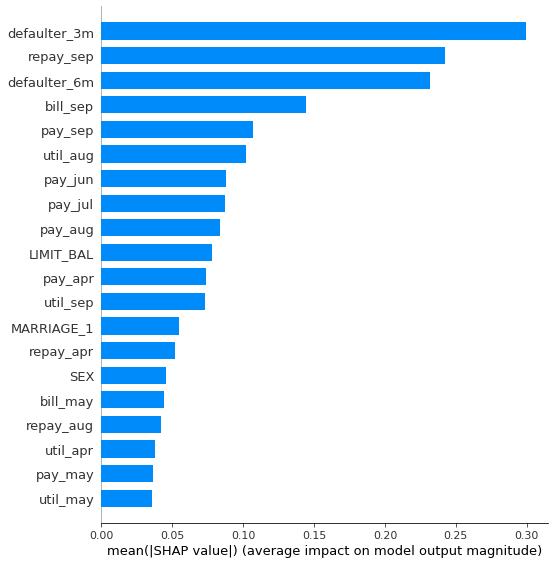

In [48]:
shap.initjs()
shap.summary_plot(train_lgbm_shap_values[1], X_train_enc, plot_type="bar")

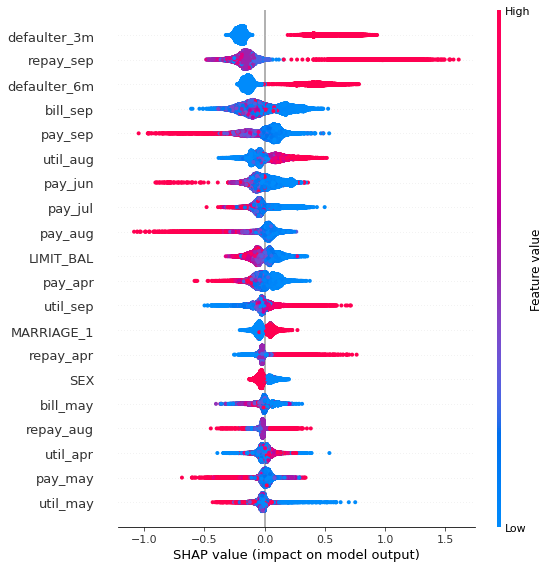

In [49]:
shap.summary_plot(train_lgbm_shap_values[1], X_train_enc)

* The first plot shows global feature importances for predicting class 1 (default), whereas the second one also shows the direction of how the feature will drive the prediction.
* The features are ranked in descending order of feature importances.
* Colour shows the value of feature (red for a higher value and blue for a lower value)
* Presence of previous default on the past 3 months seems to have bigger SHAP values and absence seems to have smaller SHAP values for class 1 (default). A similar conclusion is also valid for the defaulter_6m feature.
* Presence of married status seems to have bigger SHAP values and absence seems to have smaller SHAP values for class 1 (default).
* Examples identified as male (feature sex) seem to have smaller SHAP values and females seem to have bigger SHAP values for class 1 (default).
* Many features related to the latest months are also showing up as most important features, such as bill, amount of previous payment and repayment status for the month of September.

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  

In [50]:
#1

In [51]:
#2

#### 12.3 SHAP Force plots: <IMPORTANT!!! CHANGE THE MODEL!!!! replace pipe_lgbm by pipe_final_model>

#### Example for class 0 (do not default)

In [185]:
# Confirm class of example and assess how confident is the model about the prediction
example_class0_index = 15
pipe_lgbm_shap.named_steps["lgbmclassifier"].predict_proba(X_test_enc)[example_class0_index]

array([0.7720785, 0.2279215])

In [186]:
pipe_lgbm_shap.named_steps["lgbmclassifier"].predict(X_test_enc, raw_score=True)[example_class0_index]  # raw score of the model for this example

-1.2200849813014654

In [187]:
lgbm_explainer.expected_value[1] # base value (on average this is the raw score)

-0.4648804680749504

In [188]:
test_lgbm_shap_values[1][example_class0_index, :].sum() + lgbm_explainer.expected_value[1]

-1.1666638402757905

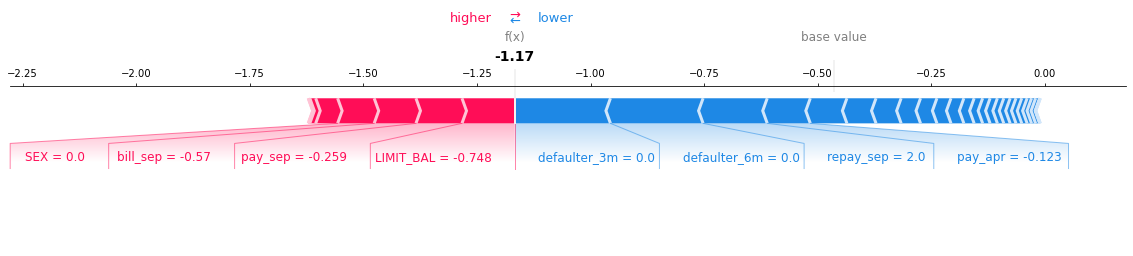

In [189]:
X_test_enc = round(X_test_enc, 3) # for better visualization
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][example_class0_index, :],
    X_test_enc.iloc[example_class0_index, :],
    matplotlib=True,
)

The raw model score is smaller than the base value  so the prediction is class 0, meaning that client will not default.

defaulter_3m =0, defaulter_6m = 0 (the client has not defaulted in the last 3/ 6 months), repay_sep=2, and pay_apr=-0.123, are pushing the prediction towards lower score.

LIMIT_BAL=-0.748, pay_sep=-0.259, bill_sep=-0.57 and SEX=0 are pushing the prediction towards higher score.

#### Example for class 1 (default)

In [180]:
# Confirm class of example and assess how confident is the model about the prediction
example_class1_index = 2
pipe_lgbm_shap.named_steps["lgbmclassifier"].predict_proba(X_test_enc)[example_class1_index]

array([0.13999183, 0.86000817])

In [181]:
pipe_lgbm_shap.named_steps["lgbmclassifier"].predict(X_test_enc, raw_score=True)[example_class1_index]  # raw score of the model for this example

1.8153578544493223

In [182]:
lgbm_explainer.expected_value[1] # base value (on average this is the raw score)

-0.4648804680749504

In [183]:
test_lgbm_shap_values[1][example_class1_index, :].sum() + lgbm_explainer.expected_value[1]

1.8153578544493216

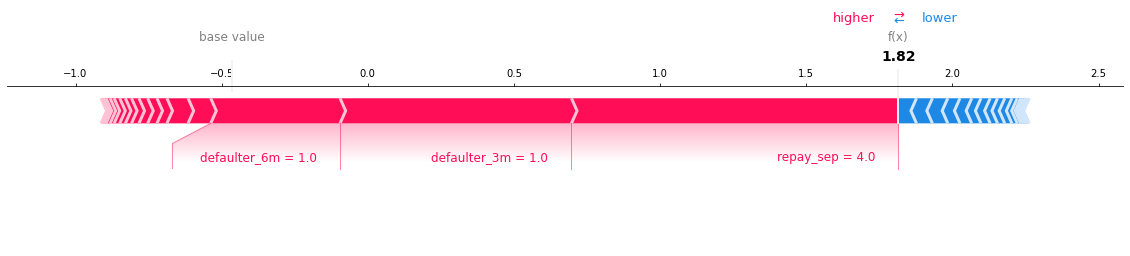

In [184]:
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][example_class1_index, :],
    X_test_enc.iloc[example_class1_index, :],
    matplotlib=True,
)

The raw model score is bigger than the base value so the prediction is class 1, meaning that the model predicts that the client **will default**.

defaulter_3m =1, defaulter_6m = 1 (the client has defaulted in the last 3/ 6 months), and repay_sep=4 (client status in September was 4 month of delay in payment) are pushing the prediction towards higher score.

There are not significant features pushing the prediction towards lower score.


<br><br>

## 13. Summary of results <a name="13"></a>
<hr>
rubric={reasoning:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

In [ ]:
#1

In [ ]:
#2

3. Other ideas that could potentially improve the performance/ interpretability but were not attempted here are:
* further feature engineering (polynomial features, extracting other domain specif features)
* over or under sampling to manage class imbalance
* ensemble models such as `VotingClassifier`
* feature selection
* explore different thresholds of `predict_proba`
* consider other loss function

In [ ]:
#4

In [53]:
#1

In [54]:
#2

3. Other ideas that could potentially improve the performance/ interpretability but were not attempted here are:
* ensemble models such as `VotingClassifier`
* further feature engineering (eg. polynomial features)
* perform feature selection
* under-sampling/over-sampling to deal with class imbalance, 
* explore different thresholds of `predict_proba`

In [55]:
#4

<br><br>

## (Optional) 14. Creating a data analysis pipeline <a name="14"></a>
rubric={reasoning:2}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. 

<br><br>

## (Optional) 15. Your takeaway from the course <a name="15"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

What is your biggest takeaway from this course? 

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Push all your work to your GitHub lab repository. 
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Well done!! Have a great weekend! 

In [61]:
#from IPython.display import Image

#Image("eva-well-done.png")